<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_9_ASSIGNMENT_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

1. (1 ponto) Design a multilayer ANN architecture to identify the hand-written digits using the
Keras deep learning library. Consider the MNIST data set

2. (1 ponto) Calculate the accuracy with training and testing data

3. (1 ponto) Also, change the architecture by tuning no. of hidden layers, no. of hidden neurons
and activation functions in hidden layer. Identify best architecture in terms of testing accuracy
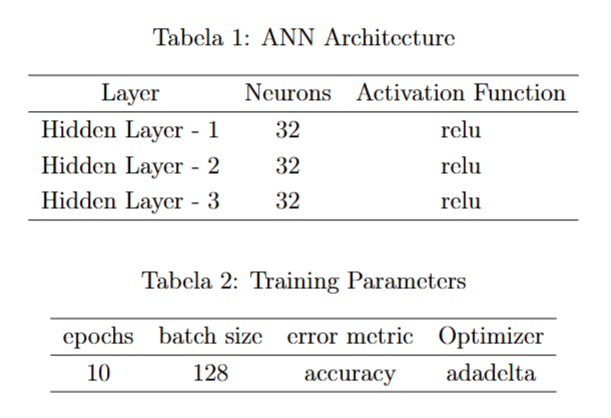

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def mnist_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

model = mnist_model()
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

model.save("mnist_model.h5")

loaded_model = tf.keras.models.load_model("mnist_model.h5")
new_data = tf.random.uniform((1, 28, 28))
predicted_result = loaded_model.predict(new_data)
print("Predicted Digit:", tf.argmax(predicted_result, axis=1).numpy()[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1068 - loss: 2.3366 - val_accuracy: 0.1122 - val_loss: 2.3136
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1105 - loss: 2.3080 - val_accuracy: 0.1176 - val_loss: 2.2877
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1200 - loss: 2.2856 - val_accuracy: 0.1302 - val_loss: 2.2650
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1298 - loss: 2.2631 - val_accuracy: 0.1465 - val_loss: 2.2444
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1436 - loss: 2.2460 - val_accuracy: 0.1625 - val_loss: 2.2250
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1630 - loss: 2.2231 - val_accuracy: 0.1800 - val_loss: 2.2062
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1771 - loss: 2.2060 - val_accuracy: 0.1977 - val_loss: 2.1875
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1973 - loss: 2.1867 - val_accuracy: 0.

Train Accuracy: 0.24348333477973938
Test Accuracy: 0.2476000040769577
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted Digit: 0
